In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2,1))

In [3]:
x = tf.zeros(shape=(2,1))

In [4]:
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)

In [6]:
print(x)

tf.Tensor(
[[-0.7551419 ]
 [-0.80965763]
 [-0.9462932 ]], shape=(3, 1), dtype=float32)


In [7]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.61757696]
 [0.4550526 ]
 [0.02452672]], shape=(3, 1), dtype=float32)


In [8]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.08477928],
       [1.1652771 ],
       [0.06576427]], dtype=float32)>


In [10]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [12]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [17]:
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [18]:
targets[:,0].shape

(2000,)

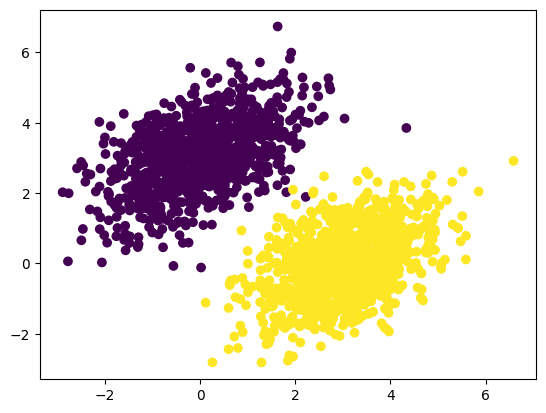

In [19]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [20]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [21]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [22]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [23]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [24]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.7226
Loss at step 1: 0.3340
Loss at step 2: 0.1411
Loss at step 3: 0.1099
Loss at step 4: 0.1000
Loss at step 5: 0.0934
Loss at step 6: 0.0877
Loss at step 7: 0.0825
Loss at step 8: 0.0777
Loss at step 9: 0.0733
Loss at step 10: 0.0693
Loss at step 11: 0.0656
Loss at step 12: 0.0622
Loss at step 13: 0.0591
Loss at step 14: 0.0563
Loss at step 15: 0.0537
Loss at step 16: 0.0513
Loss at step 17: 0.0491
Loss at step 18: 0.0470
Loss at step 19: 0.0452
Loss at step 20: 0.0435
Loss at step 21: 0.0419
Loss at step 22: 0.0405
Loss at step 23: 0.0392
Loss at step 24: 0.0380
Loss at step 25: 0.0369
Loss at step 26: 0.0359
Loss at step 27: 0.0349
Loss at step 28: 0.0341
Loss at step 29: 0.0333
Loss at step 30: 0.0326
Loss at step 31: 0.0319
Loss at step 32: 0.0313
Loss at step 33: 0.0307
Loss at step 34: 0.0302
Loss at step 35: 0.0298
Loss at step 36: 0.0293
Loss at step 37: 0.0289
Loss at step 38: 0.0286
Loss at step 39: 0.0282


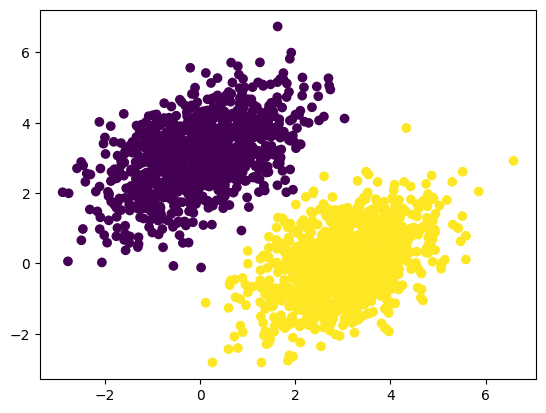

In [25]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

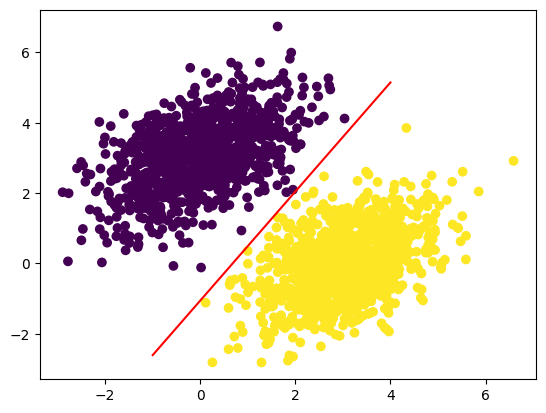

In [26]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [27]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [28]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)
